In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

東京大学数理・データサイエンスコンソーシアム 社会人向け講座 2019年秋

# 解析・線形代数入門 〜データサイエンスのための〜

第1回 2019/10/24 講義ノート

# 1-1 初等関数の微分

## 関数とは？

* 変数と変数の間の関係を表すもの
* $y=f(x)$ のように書く。$x$、$y$は変数
* $x$を入れると$y$という値が出力される「箱」(函数)
* $x$を独立変数(説明変数)、$y$を従属変数(被説明変数)と呼ぶが、必ずしも$x$が原因、$y$が結果とは限らない(c.f. 逆関数)

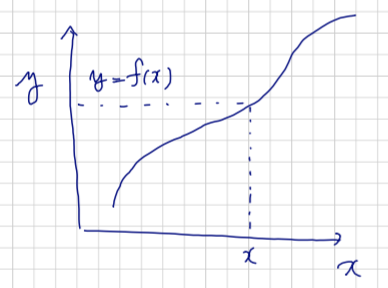

In [2]:
Image('fig-1-1.png')

* 例: 1次関数 $y = 2x + 1$、2次関数 $y = x^2$

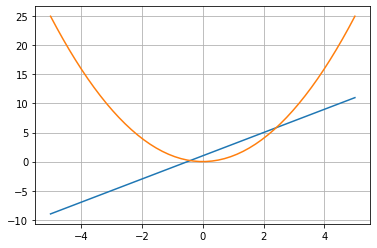

In [3]:
x = numpy.linspace(-5,5);
pyplot.plot(x, 2*x+1);
pyplot.plot(x, x**2);
pyplot.grid(which="major")

### 逆関数

* $y=f(x)$を$x=g(y)$の形に書き直したもの。$f$の逆関数であることが分かるように、$x=f^{-1}(y)$と書くことが多い
* グラフの形: 45度の線に関して引っくり返す
* 例
  * $y=2x+1$ の逆関数 → $x = (y-1)/2$
  * $y=x^2$ の逆関数 → $x=\pm \sqrt{y}$ (符号はどちらかを選ぶ)

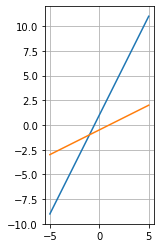

In [4]:
x = numpy.linspace(-5,5);
pyplot.plot(x, 2*x+1);
pyplot.plot(x, (x-1)/2);
pyplot.gca().set_aspect('equal');
pyplot.grid(which="major")

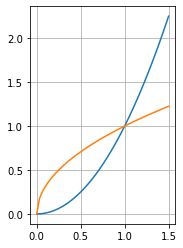

In [5]:
x = numpy.linspace(0,1.5);
pyplot.plot(x, x**2);
pyplot.plot(x, numpy.sqrt(x));
pyplot.gca().set_aspect('equal');
pyplot.grid(which="major")

## 指数関数

* 年5%の複利で$n$年預けた場合: $(1.05)^n$
* 一般に $a$ を正の定数として$a^n$を考えると、$a^1 = a$、$a^0 = 1$、$a^{(m+n)} = a^m \times a^n$
* ここで、$m=1$, $n=-1$ とすると、$a^0 = a^1 \times a^{-1} \rightarrow a^{-1} = 1/a$、同様に$a^{-m} = 1/a^m$
* $a^{(mn)} = (a^m)^n$で$m=1/2$, $n=2$ とすると、$a^{\frac{1}{2} \times 2} = (a^{\frac{1}{2}})^2 \rightarrow a^{\frac{1}{2}} = \sqrt{a}$
* $a^{1/n}$ は $n$ 乗したら $a$ になる数、$a$ の$n$乗根
* 一般の実数$x$についていくらでも近い$n/m$ ($n$, $m$は整数)を考えることができる: $a^{n/m} = (a^{1/m})^n$ $\rightarrow$ $a^x$ が定義できる
* $y= a^x$ を($a$を底とする)指数関数と呼ぶ
* 図: $0 < a < 1$, $a = 1$, $a<1$の場合

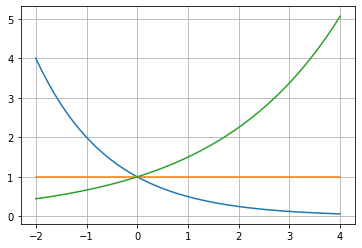

In [6]:
x = numpy.linspace(-2,4);
pyplot.plot(x, 0.5**x);
pyplot.plot(x, 1**x);
pyplot.plot(x, 1.5**x);
pyplot.grid(which="major")

### 指数関数の底
* 底が $e = 2.7128\cdots$ (ネイピア数)の場合 → 底が $e$ の指数関数 $e^x$ を $\exp x$ と書く <br>
* 底を $e$ にすると微分が便利 $\rightarrow$ 後で <br>
* 「底が $e$ の指数関数」を単に「指数関数」と呼ぶことが多い
* べき関数と指数関数の違い<br>
  * $x^2$ と $2^x$ のどちらが速く増える?

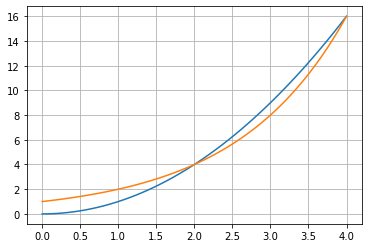

In [7]:
x = numpy.linspace(0,4);
pyplot.plot(x, x**2);
pyplot.plot(x, 2**x);
pyplot.grid(which="major")

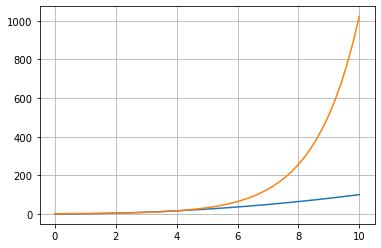

In [8]:
x = numpy.linspace(0,10);
pyplot.plot(x, x**2);
pyplot.plot(x, 2**x);
pyplot.grid(which="major")

### 関数の極限

* 変数$x$がある値$a$に近づくとき、それに伴って関数値$f(x)$がある値$\ell$に近づくとき「$x$が$a$に近づくときの関数$f(x)$の極限は$\ell$である」という
* あるいは、「関数$f(x)$は$\ell$に収束する」、「$x \rightarrow a$ のとき $f(x) \rightarrow \ell$」、「$\displaystyle \lim_{x \rightarrow a} f(x) = \ell$」などと書く
* 例1: $\displaystyle \lim_{x \rightarrow 2} x^2 = 4$
* 例2 $\displaystyle \lim_{x \rightarrow -2} (3x^2+x-1)/(x+5)^2 = 1$
* 例3:$\displaystyle \lim_{x \rightarrow 1} \frac{x^2-1}{x-1} = ?$ <br>
  * 分子分母に $x=1$ を代入すると $0/0$ となり値は不定になるように見える <br>
  * 少しづつ近づけてみる

In [9]:
def f(x):
    return (x**2 - 1) / (x-1);

print(f(2));
print(f(1.1));
print(f(1.01));
print(f(1.001));
print(f(1.0001));
print(f(1.00001));

3.0
2.1
2.009999999999999
2.0009999999999177
2.0000999999993923
2.0000100000008274


2にどんどん近づく。1より少しだけ小さい側から近づいても同様に2に近づく

In [10]:
print(f(0));
print(f(0.9));
print(f(0.99));
print(f(0.999));
print(f(0.9999));
print(f(0.99999));

1.0
1.9
1.990000000000001
1.9989999999999712
1.9998999999994975
1.9999899999991726


* ある$x=a$では関数の値が定義できないが、その上下から同じ値$\ell$に近づいていく場合もやはり、「$x$が$a$に近づくときの関数$f(x)$の極限は$\ell$である」という<br>
* 別の計算方法: $\displaystyle \lim_{x \rightarrow 1} \frac{x^2-1}{x-1} = \lim_{x \rightarrow 1} \frac{(x-1)(x+1)}{x-1} = \lim_{x \rightarrow 1} x+1 = 2$
* 例4: $\displaystyle \lim_{x \rightarrow 1+} 1/(x-1) = \infty$。一方、$\displaystyle \lim_{x \rightarrow 1-} 1/(x-1) = -\infty$ であるので、$\displaystyle \lim_{x \rightarrow 1} 1/(x-1)$ は存在しない

## 微分係数と導関数

* $x$が$a$から$a+h$まで変わるときの$f(x)$の平均変化率: $\displaystyle \frac{f(a+h)-f(a)}{(a+h)-a} = \frac{f(a+h)-f(a)}{h}$

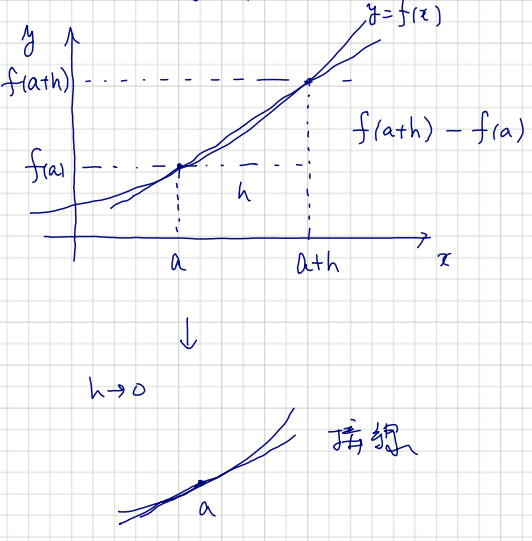

In [11]:
Image('fig-1-9.png')

* $h \rightarrow 0$ の極限を考えたものを「微分係数」と呼ぶ: $\displaystyle f'(a) = \lim_{h \rightarrow 0} \frac{f(a+h)-f(a)}{h}$
* $\displaystyle \frac{df}{dx} (a)$, $\displaystyle \frac{df}{dx} |_{x=a}$などとも書く

### 導関数

* 各点で微分可能であるとき、それぞれの$a$に対して一つの$f'(a)$が決まる。それらを全て集めると関数 $f'(x)$ が定義できる。「導関数」と呼ぶ
* 例: $f(x)=x^2$の$x=a$における微分係数、$f(x)$の導関数
* 例: $x^n$ の導関数
  
### 高階微分

* $f'(x)$ もやはり $x$ の関数なので、それの微分を考えることが可能。$n$回微分したものを$n$階導関数と呼び、$f^{(n)}(x)$と書く
* $\displaystyle f^{(n)} (x) = \frac{d^n f}{dx^n}(x) = \frac{d}{dx} f^{(n-1)}(x)$
* 例: $x^4$ の2階導関数、3階導関数

## グラフとの対応

### 関数の増減

* $f'(x) > 0$ ならば $x$ の近辺で増加
* $f'(x) < 0$ ならば $x$ の近辺で減少
* 例: $f(x) = -x^2 + x$, $f'(x) = -2x + 1$

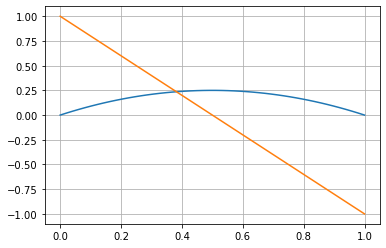

In [12]:
x = numpy.linspace(0, 1);
pyplot.plot(x, -x**2+ x);
pyplot.plot(x, -2*x + 1);
pyplot.grid(which="major")

## 指数関数の微分

### $f(x) = a^x$の場合
  
* $\displaystyle f'(x) = (a^x)' = \lim_{h\rightarrow0} (a^{(x+h)}-a^x) / h = a^x \, \lim_{h\rightarrow0} (a^h - 1)/h = f(x) f'(0)$
* $\displaystyle \lim_{h\rightarrow0} (a^h - 1)/h$ は $x$ によらず、$a$のみに依存
* $\displaystyle \lim_{h\rightarrow0} (a^h - 1)/h=1$となるような$a$を選ぶと、$f'(x) = f(x)$となって便利
* そのような$a$を$e$と書く。ネイピア数と呼ぶ。$e=2.71828182846\cdots$ (無理数)
* $e^x$を$\exp x$とも書く。通常「指数関数」という場合は底が$e$のものを指す
* $a=e$の場合、高次の導関数も全て$e^x$

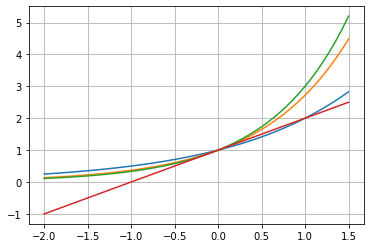

In [13]:
x = numpy.linspace(-2, 1.5);
pyplot.plot(x, 2**x);
pyplot.plot(x, numpy.exp(x));
pyplot.plot(x, 3**x);
pyplot.plot(x, x+1)
pyplot.grid(which="major")